<h3><b>Danayal Khan</h3></b>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import graphviz
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import ShuffleSplit
from sklearn import tree
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_recall_fscore_support
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import multilabel_confusion_matrix

In [57]:
df = pd.read_csv(r'C:\Users\danay\OneDrive\Desktop\AUS\Spring20\MachineLearning\FinancialDataProject\200-financial-indicators-of-us-stocks-20142018\df_out.csv', index_col = 0)


In [58]:
def classifying(x):
    if x > 1: 
        return 1
    else:
        return 0

In [59]:
def classifying1(x):
    if x > 1: 
        if x < 1000:
            return 2
        if x > 1000000:
            return 6
    else:
        if x > -100:
            return -2
        if x < 1000:
            return -4

By reducing the number of out output classes,by using function classifying() rather than classifying1(), we saw an increase in accuracy: 0.463 to 0.6430446194225722

In [60]:
df["classes"] = df['2015 PRICE VAR [%]'].apply(classifying)
df.corrwith(df["2015 PRICE VAR [%]"]).sort_values(ascending = False)

2015 PRICE VAR [%]                 1.000000
Class                              0.652077
classes                            0.651469
EPS Diluted                        0.118955
EPS                                0.117757
                                     ...   
cashPerShare                      -0.052292
Cash per Share                    -0.052292
Shareholders Equity per Share     -0.056133
Property, Plant & Equipment Net   -0.059593
Book Value per Share              -0.097445
Length: 64, dtype: float64

This applies the classifying function that produces our class outputs. 

In [61]:
df = df.drop(columns=['2015 PRICE VAR [%]','Class', 'Sector'])
nparray = df.to_numpy()

This is used to clean up data and remove all not a number fields by setting them to zero. This is because the machine learning models need data to be of a certain type (does not accept not a number entries). 

In [62]:
features = nparray[:,0:-1]
label = nparray[:,-1]

X = features
y = label

features.shape

(3788, 61)

In [63]:
features.min()

-5588140000.0

In [64]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)
print(X_train)

[[ 2.04742000e+08  1.13947000e+08  4.97380000e+07 ...  2.15600000e-01
  -1.92000000e-02 -1.31000000e-02]
 [ 7.25497000e+08  3.63677000e+08  1.70741000e+08 ...  7.41000000e-02
   1.47040000e+00  1.39300000e+00]
 [ 1.39394000e+08  4.08420000e+07  1.48340000e+07 ... -1.14700000e-01
  -1.57200000e-01 -2.79900000e-01]
 ...
 [ 4.95050000e+07  2.54960000e+07  4.03240000e+07 ...  2.63200000e-01
  -1.66470000e+00 -1.96410000e+00]
 [ 3.07301000e+08  2.04915000e+08  7.70810000e+07 ...  1.04000000e-02
   3.51000000e-02 -1.10150000e+00]
 [ 7.19457547e+08  2.07547170e+07  1.81603774e+08 ...  1.50410000e+00
   2.40400000e-01  9.32000000e-02]]


<h3><b>SVM Linear</h3></b>

If the model is overfitting, reduce the value of the hyperparamter C

The LinearSVC class regularizes the bias term, so you should center the training set first by subtracting its mean. This is automatic if you scale the data using the StandardScaler. Also make sure you set the loss hyperparameter to "hinge", as it is not the default value. Finally, for better performance, you should set the dual hyperparameter to False, unless there are more features than training instances

In [9]:
a = [1,2,3,4]

a[0:3]

[1, 2, 3]

In [77]:
resultsDF = resultsDF.iloc[0:0]


In [79]:
resultsDF

,Precision,Recall,Fscore,Train score,Test score
Classifier,,,,,


Train and Fit

In [10]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline



scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, dual=False,  random_state=42)
svm_clf2 = LinearSVC(C=100, dual = False, random_state=42)

scaled_svm_clf1 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf1),
    ])
scaled_svm_clf2 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf2),
    ])


##########CLF1####

scaled_svm_clf1.fit(X_train, y_train)

y_pred_svm1 = scaled_svm_clf1.predict(X_test)

confusionamtrixSVMLinear = multilabel_confusion_matrix(y_test, y_pred_svm1)

print(confusionamtrixSVMLinear)


train_score_svm1 = scaled_svm_clf1.score(X_train, y_train)
test_score_svm1 = scaled_svm_clf1.score(X_test, y_test)

#############CLF2###############

scaled_svm_clf2.fit(X_train, y_train)
y_pred_svm2 = scaled_svm_clf2.predict(X_test)

print(multilabel_confusion_matrix(y_test, y_pred_svm2))





[[[ 82 204]
  [ 65 407]]

 [[407  65]
  [204  82]]]
[[[ 83 203]
  [ 65 407]]

 [[407  65]
  [203  83]]]


In [80]:
resultsSVMLinear = list(precision_recall_fscore_support(y_test, y_pred_svm1, average='macro'))
resultsSVMLinear.insert(0, "SVM Linear C = 1")

resultsSVMLinear.pop(4)
resultsSVMLinear.insert(4, train_score_svm1)
resultsSVMLinear.insert(5, test_score_svm1)



resultsDF = pd.DataFrame([resultsSVMLinear], columns = ['Classifier','Precision','Recall','Fscore', 'Train score', 'Test score']).set_index('Classifier')


In [81]:
train_score_svm2 = scaled_svm_clf2.score(X_train, y_train)
test_score_svm2 = scaled_svm_clf2.score(X_test, y_test)


resultsSVMLinear2 = list(precision_recall_fscore_support(y_test, y_pred_svm2, average='macro'))
resultsSVMLinear2.insert(0,'SVM Linear C = 100')
resultsSVMLinear2.pop(4)
resultsSVMLinear2.insert(4, train_score_svm2)
resultsSVMLinear2.insert(5, test_score_svm2)

df2 = pd.DataFrame([resultsSVMLinear2], columns = ['Classifier','Precision','Recall','Fscore', 'Train score', 'Test score']).set_index('Classifier')


resultsDF = resultsDF.append([df2])

In [82]:
resultsDF

,Precision,Recall,Fscore,Train score,Test score
Classifier,,,,,
SVM Linear C = 1,0.611972,0.574501,0.565184,0.635974,0.645119
SVM Linear C = 100,0.614012,0.576249,0.567400,0.636634,0.646438


<h3><b>SVM Non-Linear</h3></b>

In [14]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=2)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, dual = False, random_state=42))
    ])

polynomial_svm_clf.fit(X_train, y_train)

y_pred_polynomial_svm_clf = polynomial_svm_clf.predict(X_test)
print(multilabel_confusion_matrix(y_test, y_pred_polynomial_svm_clf))


# results = precision_recall_fscore_support(y_test, y_pred, average='macro')
# print ("precision ", results[0], " recall ", results[1], " fscore ", results[2])




[[[167 119]
  [ 50 422]]

 [[422  50]
  [119 167]]]


C:\Users\danay\Anaconda3\envs\deeplearning\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [83]:
train_score_polynomial_svm_clf = polynomial_svm_clf.score(X_train, y_train)
test_score_polynomial_svm_clf = polynomial_svm_clf.score(X_test, y_test)


results = list(precision_recall_fscore_support(y_test, y_pred_polynomial_svm_clf, average='macro'))
results.insert(0,'polynomial_svm_clf C = 10, degree = 2')
results.pop(4)
results.insert(4, train_score_polynomial_svm_clf)
results.insert(5, test_score_polynomial_svm_clf)

df3 = pd.DataFrame([results], columns = ['Classifier','Precision','Recall','Fscore', 'Train score', 'Test score']).set_index('Classifier')


resultsDF = resultsDF.append([df3])

In [84]:
resultsDF

,Precision,Recall,Fscore,Train score,Test score
Classifier,,,,,
SVM Linear C = 1,0.611972,0.574501,0.565184,0.635974,0.645119
SVM Linear C = 100,0.614012,0.576249,0.567400,0.636634,0.646438
"polynomial_svm_clf C = 10, degree = 2",0.774811,0.738992,0.748592,0.829703,0.844327


Trying with different number of polynomial degree

In [17]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, dual = False, random_state=42))
    ])

polynomial_svm_clf.fit(X_train, y_train)

y_pred_svm_poly_c10 = polynomial_svm_clf.predict(X_test)
print(multilabel_confusion_matrix(y_test, y_pred_svm_poly_c10))



#print ("precision ", results[0], " recall ", results[1], " fscore ", results[2])


C:\Users\danay\Anaconda3\envs\deeplearning\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[[[195  91]
  [ 27 445]]

 [[445  27]
  [ 91 195]]]


In [85]:
train_score_svm_poly_c10 = polynomial_svm_clf.score(X_train, y_train)
test_score_svm_poly_c10 = polynomial_svm_clf.score(X_test, y_test)


results = list(precision_recall_fscore_support(y_test, y_pred_svm_poly_c10, average='macro'))
results.insert(0,'polynomial_svm_clf C = 10, degree = 3')
results.pop(4)
results.insert(4, train_score_svm_poly_c10)
results.insert(5, test_score_svm_poly_c10)

df4 = pd.DataFrame([results], columns = ['Classifier','Precision','Recall','Fscore', 'Train score', 'Test score']).set_index('Classifier')


resultsDF = resultsDF.append([df4])

<h3><b>SVM Non-Linear using the Kernal Trick</h3></b>

In [19]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])
poly_kernel_svm_clf.fit(X_train, y_train)

y_pred_poly_kernel_svm_clf = poly_kernel_svm_clf.predict(X_test)
print(multilabel_confusion_matrix(y_test, y_pred_poly_kernel_svm_clf))

[[[133 153]
  [ 18 454]]

 [[454  18]
  [153 133]]]


In [86]:
train_score_poly_kernel_svm_clf = polynomial_svm_clf.score(X_train, y_train)
test_score_poly_kernel_svm_clf = polynomial_svm_clf.score(X_test, y_test)


results = list(precision_recall_fscore_support(y_test, y_pred_poly_kernel_svm_clf, average='macro'))
results.insert(0,'poly_kernel_svm_clf C = 5, degree = 3')
results.pop(4)
results.insert(4, train_score_poly_kernel_svm_clf)
results.insert(5, test_score_poly_kernel_svm_clf)

df5 = pd.DataFrame([results], columns = ['Classifier','Precision','Recall','Fscore', 'Train score', 'Test score']).set_index('Classifier')


resultsDF = resultsDF.append([df5])

In [87]:
poly_kernel_svm_clf20 = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=2, C=20))
    ])
poly_kernel_svm_clf20.fit(X_train, y_train)

y_pred_poly_kernel_svm_clf_c20 = poly_kernel_svm_clf20.predict(X_test)
print(multilabel_confusion_matrix(y_test, y_pred_poly_kernel_svm_clf_c20))



##############
train_score_poly_kernel_svm_clf_c20 = poly_kernel_svm_clf20.score(X_train, y_train)
test_score_poly_kernel_svm_clf_c20 = poly_kernel_svm_clf20.score(X_test, y_test)


results = list(precision_recall_fscore_support(y_test, y_pred_poly_kernel_svm_clf_c20, average='macro'))
results.insert(0,'poly_kernel_svm_clf20 C = 20, degree = 3')
results.pop(4)
results.insert(4, train_score_poly_kernel_svm_clf_c20)
results.insert(5, test_score_poly_kernel_svm_clf_c20)



###########


df6 = pd.DataFrame([results], columns = ['Classifier','Precision','Recall','Fscore', 'Train score', 'Test score']).set_index('Classifier')


resultsDF = resultsDF.append([df6])

[[[109 177]
  [ 95 377]]

 [[377  95]
  [177 109]]]


In [93]:
resultsDF

,Precision,Recall,Fscore,Train score,Test score
Classifier,,,,,
SVM Linear C = 1,0.611972,0.574501,0.565184,0.635974,0.645119
SVM Linear C = 100,0.614012,0.576249,0.567400,0.636634,0.646438
"polynomial_svm_clf C = 10, degree = 2",0.774811,0.738992,0.748592,0.829703,0.844327
"polynomial_svm_clf C = 10, degree = 3",0.854301,0.812307,0.825327,0.829703,0.844327
"poly_kernel_svm_clf C = 5, degree = 3",0.814368,0.713450,0.725108,0.829703,0.844327
"poly_kernel_svm_clf20 C = 20, degree = 3",0.607410,0.589924,0.589895,0.808251,0.641161
knn 50,0.632879,0.574338,0.557937,0.634653,0.654354
knn 10,0.632879,0.574338,0.557937,0.634653,0.654354
knn 3,0.632879,0.574338,0.557937,0.787789,0.585752


<h3><b>KNN</h3></b>

In [89]:
from sklearn.neighbors import KNeighborsClassifier

In [90]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train,y_train)

y_pred_knn50 = knn.predict(X_test)
print(multilabel_confusion_matrix(y_test, y_pred_knn50))



train_score_knn50 = knn.score(X_train, y_train)
test_score_knn50 = knn.score(X_test, y_test)


results = list(precision_recall_fscore_support(y_test, y_pred_knn50, average='macro'))
results.insert(0,'knn 50')
results.pop(4)
results.insert(4, train_score_knn50)
results.insert(5, test_score_knn50)

df7 = pd.DataFrame([results], columns = ['Classifier','Precision','Recall','Fscore', 'Train score', 'Test score']).set_index('Classifier')


resultsDF = resultsDF.append([df7])


[[[ 71 215]
  [ 47 425]]

 [[425  47]
  [215  71]]]


In [91]:
knn10 = KNeighborsClassifier(n_neighbors=10)
knn10.fit(X_train,y_train)

y_pred_knn10 = knn.predict(X_test)
print(multilabel_confusion_matrix(y_test, y_pred_knn10))



train_score_knn10 = knn.score(X_train, y_train)
test_score_knn10 = knn.score(X_test, y_test)


results = list(precision_recall_fscore_support(y_test, y_pred_knn10, average='macro'))
results.insert(0,'knn 10')
results.pop(4)
results.insert(4, train_score_knn10)
results.insert(5, test_score_knn10)

df8 = pd.DataFrame([results], columns = ['Classifier','Precision','Recall','Fscore', 'Train score', 'Test score']).set_index('Classifier')


resultsDF = resultsDF.append([df8])


[[[ 71 215]
  [ 47 425]]

 [[425  47]
  [215  71]]]


In [92]:
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train,y_train)

y_pred_knn3 = knn.predict(X_test)
print(multilabel_confusion_matrix(y_test, y_pred_knn3))



train_score_knn3 = knn3.score(X_train, y_train)
test_score_knn3 = knn3.score(X_test, y_test)


results = list(precision_recall_fscore_support(y_test, y_pred_knn3, average='macro'))
results.insert(0,'knn 3')
results.pop(4)
results.insert(4, train_score_knn3)
results.insert(5, test_score_knn3)

df9 = pd.DataFrame([results], columns = ['Classifier','Precision','Recall','Fscore', 'Train score', 'Test score']).set_index('Classifier')


resultsDF = resultsDF.append([df9])


[[[ 71 215]
  [ 47 425]]

 [[425  47]
  [215  71]]]


In [103]:
resultsDF

,Precision,Recall,Fscore,Train score,Test score
Classifier,,,,,
SVM Linear C = 1,0.611972,0.574501,0.565184,0.635974,0.645119
SVM Linear C = 100,0.614012,0.576249,0.567400,0.636634,0.646438
"polynomial_svm_clf C = 10, degree = 2",0.774811,0.738992,0.748592,0.829703,0.844327
"polynomial_svm_clf C = 10, degree = 3",0.854301,0.812307,0.825327,0.829703,0.844327
"poly_kernel_svm_clf C = 5, degree = 3",0.814368,0.713450,0.725108,0.829703,0.844327
"poly_kernel_svm_clf20 C = 20, degree = 3",0.607410,0.589924,0.589895,0.808251,0.641161
knn 50,0.632879,0.574338,0.557937,0.634653,0.654354
knn 10,0.632879,0.574338,0.557937,0.634653,0.654354
knn 3,0.632879,0.574338,0.557937,0.787789,0.585752


<h3><b>Naive Bayes</h3></b>

In [94]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))


print(multilabel_confusion_matrix(y_test, y_pred))




train_score_nb = gnb.score(X_train, y_train)
test_score_nb = gnb.score(X_test, y_test)


results = list(precision_recall_fscore_support(y_test, y_pred_knn, average='macro'))
results.insert(0,'Naive Baye')
results.pop(4)
results.insert(4, train_score_nb)
results.insert(5, test_score_nb)




###########


df10 = pd.DataFrame([results], columns = ['Classifier','Precision','Recall','Fscore', 'Train score', 'Test score']).set_index('Classifier')


resultsDF = resultsDF.append([df10])


Number of mislabeled points out of a total 758 points : 444
[[[249  37]
  [407  65]]

 [[ 65 407]
  [ 37 249]]]


C:\Users\danay\Anaconda3\envs\deeplearning\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<h3> <b>Decision Tree Classifier</h3></b>

In [27]:
train_i = []
test_i = []
max_depth = [5,10,15,20,50,100]
min_samples_split = [5,10,15,20,50,100]
min_samples_leaf = [5,10,15,20,50,100]
max_leaf_nodes = [5,10,15,20,50,100]

md_dict = []
mss_dict = []
msl_dict = []
msn_dict = []

In order to find the best hyper parameters, we are using combinations of parameters such as maximum depth, minimum sample split, maximum leaf nodes and min samples for leafs. After creating classifiers with all these combinations (maximum of 1296), we will use functions to find the best hyper parameter which will create the best possible classifier. 

We are creating over a 100 random testing and training splits (80 and 20 split) in order to ensure that there is no single random split bias. 

In [28]:
for max_depth_iter in max_depth:
    for min_samples_split_iter in min_samples_split:
        for min_samples_leaf_iter in min_samples_leaf:
            for max_leaf_nodes_iter in max_leaf_nodes: 
                X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)
                clf_1 = DecisionTreeClassifier(max_depth=max_depth_iter, min_samples_split = min_samples_split_iter, min_samples_leaf = min_samples_leaf_iter, max_leaf_nodes = max_leaf_nodes_iter)
                clf_1.fit(X_train, y_train)
                # Predict
                p_i= clf_1.predict(X_test) 
                train_i += [clf_1.score(X_train, y_train)]
                test_i += [clf_1.score(X_test, y_test)]
                md_dict += [max_depth_iter]
                mss_dict += [min_samples_split_iter]
                msl_dict += [min_samples_leaf_iter]
                msn_dict += [max_leaf_nodes_iter]
result_dict = {'train_score' : train_i, 'test_score' : test_i, 'max_depth' : md_dict, 'min_samples_split' : mss_dict, 'min_samples_leaf' : msl_dict, 'max_leaf_nodes' : msn_dict}
df_store = pd.DataFrame.from_dict(result_dict)    
    
    

In [29]:
best_index = int(str(df_store["test_score"].sort_values(ascending = False)).split(" ")[0])


This variable contains the row which will hold the best possible test score. 

Below are plots of how training and testing scores vary with varying parameters. 

In [95]:
best_depth = df_store.loc[best_index, "max_depth"]
best_mss = df_store.loc[best_index, "min_samples_split"]
best_msl = df_store.loc[best_index, "min_samples_leaf"]
best_mln = df_store.loc[best_index, "max_leaf_nodes"]
best_classifier = DecisionTreeClassifier(max_depth=best_depth, min_samples_split = best_mss, min_samples_leaf = best_msl, max_leaf_nodes = best_mln)
best_classifier.fit(X_train, y_train)

y_pred = best_classifier.predict(X_test)

print(multilabel_confusion_matrix(y_test, y_pred))

train_score_dtc = best_classifier.score(X_train, y_train)
test_score_dtc = best_classifier.score(X_test, y_test)


results = list(precision_recall_fscore_support(y_test, y_pred_knn, average='macro'))
results.insert(0,'Decision Tree Classifier')
results.pop(4)
results.insert(4, train_score_dtc)
results.insert(5, test_score_dtc)




###########


df11 = pd.DataFrame([results], columns = ['Classifier','Precision','Recall','Fscore', 'Train score', 'Test score']).set_index('Classifier')


resultsDF = resultsDF.append([df11])


[[[101 185]
  [ 84 388]]

 [[388  84]
  [185 101]]]


C:\Users\danay\Anaconda3\envs\deeplearning\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The classifier "best_classifier" is created from parameters retrieved from the row with the highest testing score. A plot of the decision tree can be seen below. 

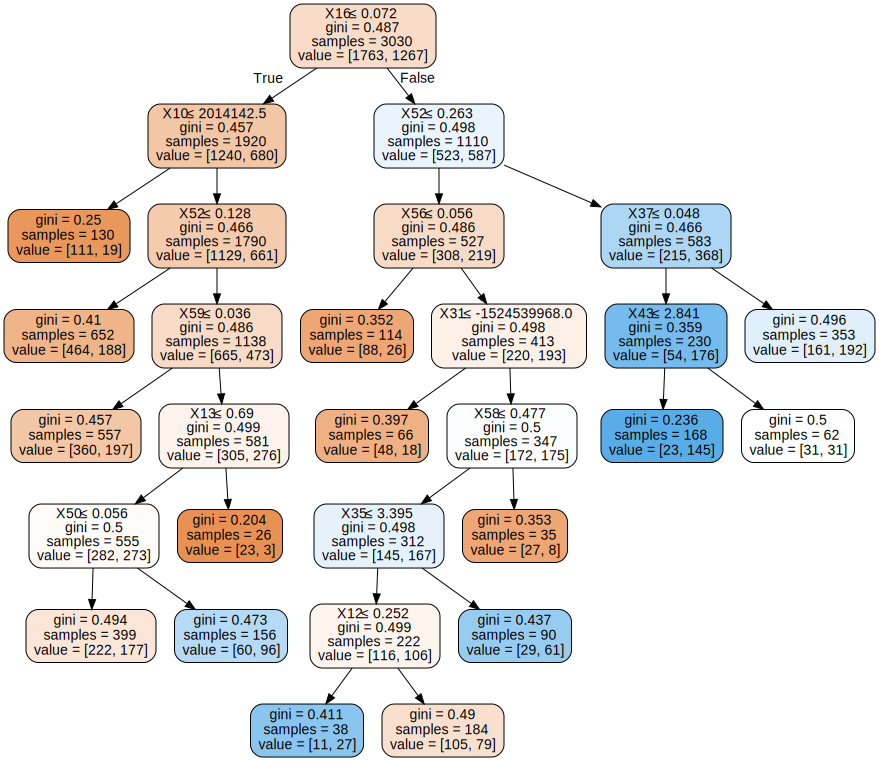

In [31]:
dot_data = tree.export_graphviz(best_classifier, out_file=None, 
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [32]:
print('Training accuracy is: ', best_classifier.score(X_train, y_train))
print('Predicion accuracy is: ', best_classifier.score(X_test, y_test))


Training accuracy is:  0.6600660066006601
Predicion accuracy is:  0.6451187335092349


In [96]:
resultsDF

,Precision,Recall,Fscore,Train score,Test score
Classifier,,,,,
SVM Linear C = 1,0.611972,0.574501,0.565184,0.635974,0.645119
SVM Linear C = 100,0.614012,0.576249,0.567400,0.636634,0.646438
"polynomial_svm_clf C = 10, degree = 2",0.774811,0.738992,0.748592,0.829703,0.844327
"polynomial_svm_clf C = 10, degree = 3",0.854301,0.812307,0.825327,0.829703,0.844327
"poly_kernel_svm_clf C = 5, degree = 3",0.814368,0.713450,0.725108,0.829703,0.844327
"poly_kernel_svm_clf20 C = 20, degree = 3",0.607410,0.589924,0.589895,0.808251,0.641161
knn 50,0.632879,0.574338,0.557937,0.634653,0.654354
knn 10,0.632879,0.574338,0.557937,0.634653,0.654354
knn 3,0.632879,0.574338,0.557937,0.787789,0.585752


In [97]:
resultsDF.sort_values("Precision", ascending = False)

,Precision,Recall,Fscore,Train score,Test score
Classifier,,,,,
"polynomial_svm_clf C = 10, degree = 3",0.854301,0.812307,0.825327,0.829703,0.844327
"poly_kernel_svm_clf C = 5, degree = 3",0.814368,0.713450,0.725108,0.829703,0.844327
"polynomial_svm_clf C = 10, degree = 2",0.774811,0.738992,0.748592,0.829703,0.844327
knn 50,0.632879,0.574338,0.557937,0.634653,0.654354
knn 10,0.632879,0.574338,0.557937,0.634653,0.654354
knn 3,0.632879,0.574338,0.557937,0.787789,0.585752
SVM Linear C = 100,0.614012,0.576249,0.567400,0.636634,0.646438
SVM Linear C = 1,0.611972,0.574501,0.565184,0.635974,0.645119
"poly_kernel_svm_clf20 C = 20, degree = 3",0.607410,0.589924,0.589895,0.808251,0.641161


In [98]:
resultsDF.sort_values("Recall", ascending = False)

,Precision,Recall,Fscore,Train score,Test score
Classifier,,,,,
"polynomial_svm_clf C = 10, degree = 3",0.854301,0.812307,0.825327,0.829703,0.844327
"polynomial_svm_clf C = 10, degree = 2",0.774811,0.738992,0.748592,0.829703,0.844327
"poly_kernel_svm_clf C = 5, degree = 3",0.814368,0.713450,0.725108,0.829703,0.844327
"poly_kernel_svm_clf20 C = 20, degree = 3",0.607410,0.589924,0.589895,0.808251,0.641161
SVM Linear C = 100,0.614012,0.576249,0.567400,0.636634,0.646438
SVM Linear C = 1,0.611972,0.574501,0.565184,0.635974,0.645119
knn 50,0.632879,0.574338,0.557937,0.634653,0.654354
knn 10,0.632879,0.574338,0.557937,0.634653,0.654354
knn 3,0.632879,0.574338,0.557937,0.787789,0.585752


In [99]:
resultsDF.sort_values("Fscore", ascending = False)

,Precision,Recall,Fscore,Train score,Test score
Classifier,,,,,
"polynomial_svm_clf C = 10, degree = 3",0.854301,0.812307,0.825327,0.829703,0.844327
"polynomial_svm_clf C = 10, degree = 2",0.774811,0.738992,0.748592,0.829703,0.844327
"poly_kernel_svm_clf C = 5, degree = 3",0.814368,0.713450,0.725108,0.829703,0.844327
"poly_kernel_svm_clf20 C = 20, degree = 3",0.607410,0.589924,0.589895,0.808251,0.641161
SVM Linear C = 100,0.614012,0.576249,0.567400,0.636634,0.646438
SVM Linear C = 1,0.611972,0.574501,0.565184,0.635974,0.645119
knn 50,0.632879,0.574338,0.557937,0.634653,0.654354
knn 10,0.632879,0.574338,0.557937,0.634653,0.654354
knn 3,0.632879,0.574338,0.557937,0.787789,0.585752


In [101]:
resultsDF.sort_values("Train score", ascending = False)

,Precision,Recall,Fscore,Train score,Test score
Classifier,,,,,
"polynomial_svm_clf C = 10, degree = 2",0.774811,0.738992,0.748592,0.829703,0.844327
"polynomial_svm_clf C = 10, degree = 3",0.854301,0.812307,0.825327,0.829703,0.844327
"poly_kernel_svm_clf C = 5, degree = 3",0.814368,0.713450,0.725108,0.829703,0.844327
"poly_kernel_svm_clf20 C = 20, degree = 3",0.607410,0.589924,0.589895,0.808251,0.641161
knn 3,0.632879,0.574338,0.557937,0.787789,0.585752
Decision Tree Classifier,0.177913,0.168327,0.148918,0.660066,0.645119
SVM Linear C = 100,0.614012,0.576249,0.567400,0.636634,0.646438
SVM Linear C = 1,0.611972,0.574501,0.565184,0.635974,0.645119
knn 50,0.632879,0.574338,0.557937,0.634653,0.654354


In [102]:
resultsDF.sort_values("Test score", ascending = False)

,Precision,Recall,Fscore,Train score,Test score
Classifier,,,,,
"polynomial_svm_clf C = 10, degree = 2",0.774811,0.738992,0.748592,0.829703,0.844327
"polynomial_svm_clf C = 10, degree = 3",0.854301,0.812307,0.825327,0.829703,0.844327
"poly_kernel_svm_clf C = 5, degree = 3",0.814368,0.713450,0.725108,0.829703,0.844327
knn 50,0.632879,0.574338,0.557937,0.634653,0.654354
knn 10,0.632879,0.574338,0.557937,0.634653,0.654354
SVM Linear C = 100,0.614012,0.576249,0.567400,0.636634,0.646438
SVM Linear C = 1,0.611972,0.574501,0.565184,0.635974,0.645119
Decision Tree Classifier,0.177913,0.168327,0.148918,0.660066,0.645119
"poly_kernel_svm_clf20 C = 20, degree = 3",0.607410,0.589924,0.589895,0.808251,0.641161


As the table of results of different classifiers shows, the highest precision, recall, and Fscore were achieved by using SVM Non Linear with C paramter = 10 and of degree 3. This is not surprising since SVMs achieve high accuracies when the data is large and has multiple features. SVMs deploy efficient algorithms to find the global minimum; unlike other algorithms that employ a greedy-based strategy to search for the hypothesis space resulting in a tendency to only find locally optimum solutions. 

The Naive Bayes classifier perfomed the worst as there are features that are not completely independent of one another which is obvious when it comes to financial characteristics of different stocks.

In [112]:
rslt_df = resultsDF[resultsDF['Train score'] > resultsDF['Test score'] ] 
rslt_df

,Precision,Recall,Fscore,Train score,Test score
Classifier,,,,,
"poly_kernel_svm_clf20 C = 20, degree = 3",0.607410,0.589924,0.589895,0.808251,0.641161
knn 3,0.632879,0.574338,0.557937,0.787789,0.585752
Naive Baye,0.177913,0.168327,0.148918,0.465347,0.414248
Decision Tree Classifier,0.177913,0.168327,0.148918,0.660066,0.645119


From the above tabe, it can be seen that the polynomial SVM classifier with C = 20 and degree = 3 has overfit the training data. The model is accurate for the training data but does not generalize well for the test data. This could be because of the high degree of the hyperparamter C

It can be seen that K-Nearest Nieghbors with K = 3 has also overfit the data and a result, a higher value of K is more desirable. KNN with values 10 and 50 perform better in terms of fitting the data.